In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import Swarm as sw
import numpy as np
import sys

### Ackley Function

In [2]:
def ackley_function(vec):
    x = vec[0]
    y = vec[1]
    # xi ∈ [-32.768, 32.768]
    a = 20
    b = .2
    c = 2*np.pi
    
    return -a*np.exp(-b*np.sqrt((x**2 + y**2)/2)) \
        - np.exp((np.cos(c*x) + np.cos(c*y))/2) + a + np.e

3.3850234689696994


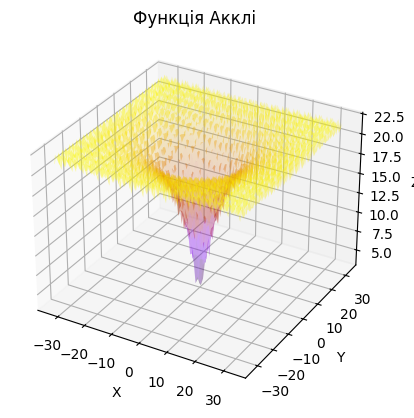

In [3]:
x = np.linspace(-32.768, 32.768, 100)
y = np.linspace(-32.768, 32.768, 100)
X, Y = np.meshgrid(x, y)
Z = ackley_function([X, Y])
print(np.min(Z))

# Відображення 3D графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gnuplot', alpha=.2)

# Налаштування підписів
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Функція Акклі')

plt.show()

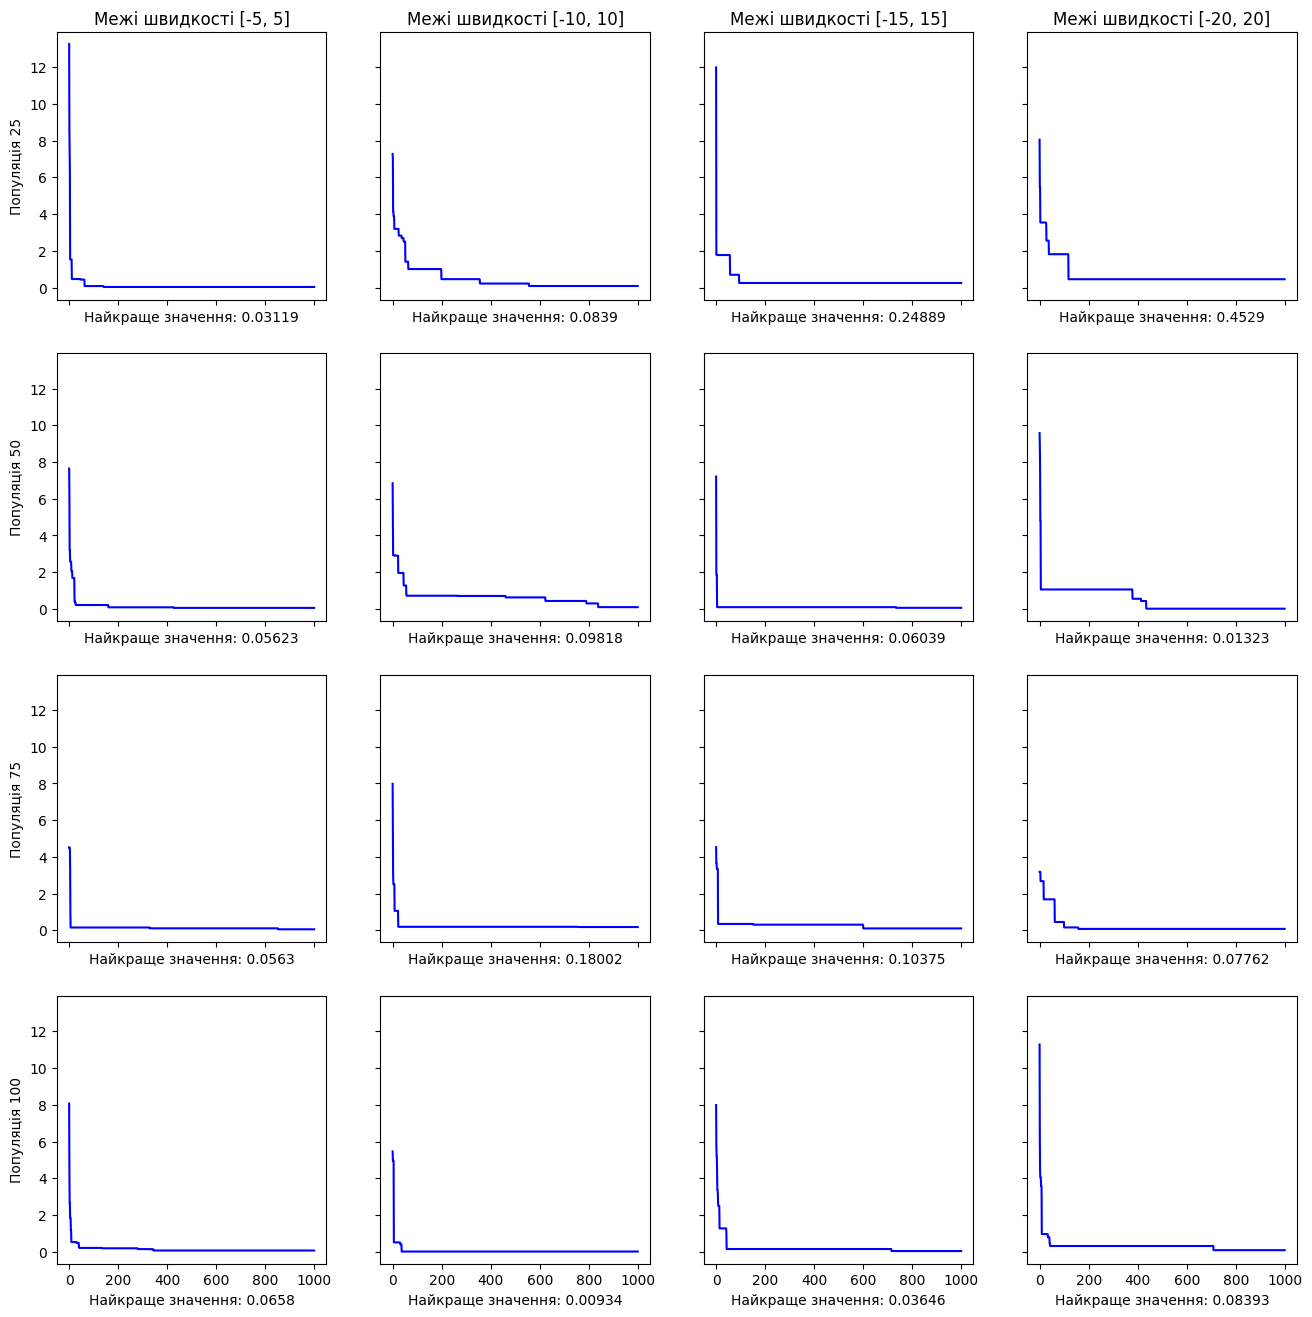

In [4]:
populations = [25, 50, 75, 100]
speeds = [5, 10, 15, 20]

fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)

for p in range(4):
    for s in range(4):
        ackl_bsf, _, _ = sw.PSO(ackley_function, 1000, populations[p], 2, [-32.768]*2, [32.768]*2, [-speeds[s]]*2, [speeds[s]]*2)
        axs[p][s].plot(list(range(1000)), ackl_bsf, color="blue")
        axs[p][s].set_xlabel(f"Найкраще значення: {round(min(ackl_bsf), 5)}")
        if p == 0:
            axs[p][s].set_title(f"Межі швидкості [-{speeds[s]}, {speeds[s]}]")
        if s == 0:
            axs[p][s].set_ylabel(f"Популяція {populations[p]}")

In [ ]:
ackl_bsf, ackl_bp, ackl_swrm = sw.PSO(ackley_function, 100, 75, 2, [-32.768]*2, [32.768]*2, [-5]*2, [5]*2)

In [ ]:
# Налаштування фігури
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


def update(frame):
    ax1.clear()
    ax2.clear()
    
    x_swrm = (ackl_swrm[frame])[..., 0]
    y_swrm = (ackl_swrm[frame])[..., 1]
    z_swrm = ackley_function([x_swrm, y_swrm])
    
    ax1.plot_surface(X, Y, Z, cmap='gnuplot', alpha=0.2)
    ax1.scatter(x_swrm, y_swrm, z_swrm, c='green')
    ax1.scatter(ackl_bp[frame][0], ackl_bp[frame][1], ackl_bsf[frame], c='red')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D-графік пошуку')
    ax1.legend()
    
    
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='gnuplot')
    ax2.scatter(x_swrm, y_swrm, c='green', s=20)
    ax2.scatter(ackl_bp[frame][0], ackl_bp[frame][1], c='red', s=20)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Контурний графік')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    
    # Заголовок з номером ітерації
    fig.suptitle(f'Ітерація: {frame + 1}, Найкраще значення: {ackl_bsf[frame]}')
    return contour, 

# Генерація анімації
ani = FuncAnimation(
    fig, 
    update, 
    frames=100, 
    interval=50,
    blit=True
)

# Збереження у форматі GIF
ani.save('Ackley.gif', fps=12)

plt.close()

C:\Users\berku\AppData\Local\Temp\ipykernel_30412\2989712296.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\berku\AppData\Local\Temp\ipykernel_30412\2989712296.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


### Rosenbrock Function

In [7]:
def rosenbrock_function(vec):
    # xi є [-2.048, 2.048]
    x = vec[0]
    y = vec[1]
    return 100*(y - x**2)**2 + (x-1)**2

0.01934955340617872


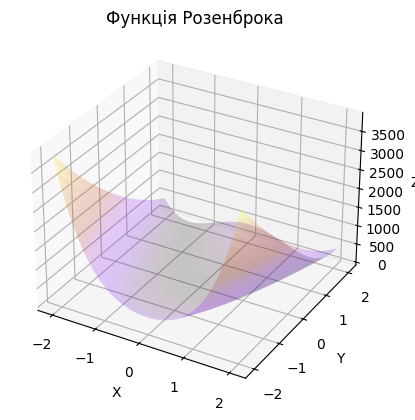

In [30]:
x = np.linspace(-2.048, 2.048, 100)
y = np.linspace(-2.048, 2.048, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_function([X, Y])
print(np.min(Z))

# Відображення 3D графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gnuplot', alpha=.2)

# Налаштування підписів
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Функція Розенброка')

plt.show()

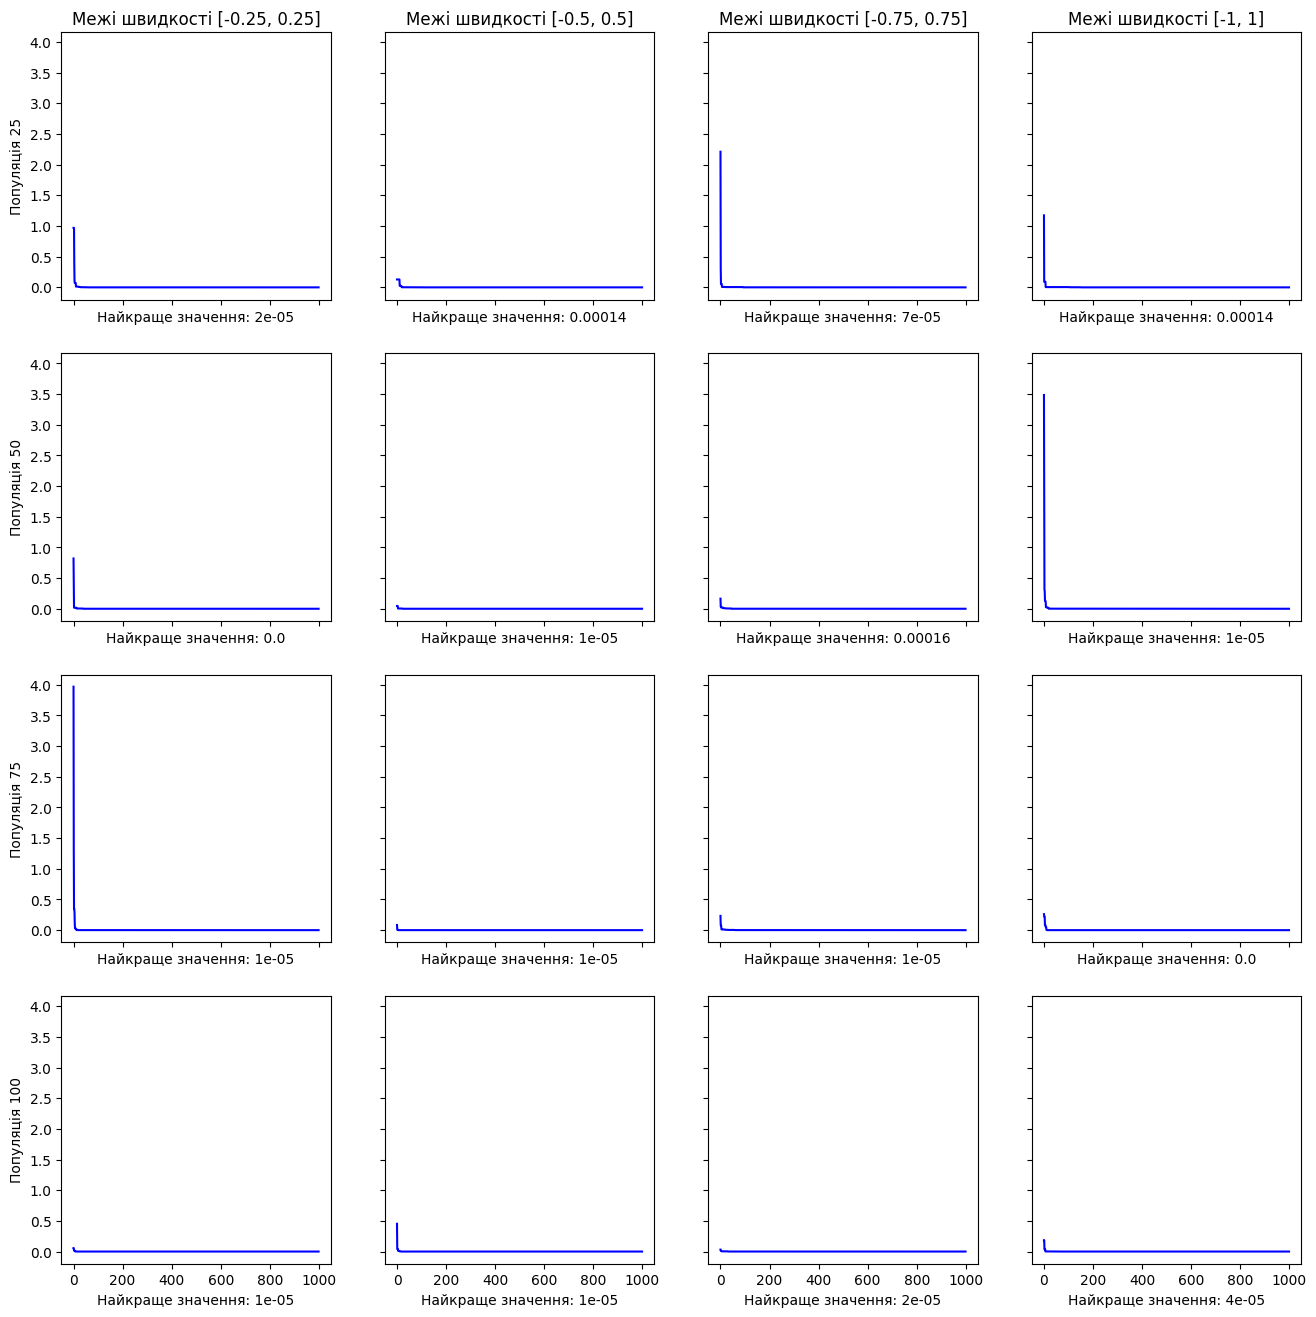

In [31]:
populations = [25, 50, 75, 100]
speeds = [.25, .5, .75, 1]

fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)

for p in range(4):
    for s in range(4):
        bsf, _, _ = sw.PSO(rosenbrock_function, 1000, populations[p], 2, [-2.048]*2, [2.048]*2, [-speeds[s]]*2, [speeds[s]]*2)
        axs[p][s].plot(list(range(1000)), bsf, color="blue")
        axs[p][s].set_xlabel(f"Найкраще значення: {round(min(bsf), 5)}")
        if p == 0:
            axs[p][s].set_title(f"Межі швидкості [-{speeds[s]}, {speeds[s]}]")
        if s == 0:
            axs[p][s].set_ylabel(f"Популяція {populations[p]}")

In [32]:
rb_bsf, rb_bp, rb_swrm = sw.PSO(rosenbrock_function, 100, 75, 2, [-2.048]*2, [2.048]*2, [-.25]*2, [.25]*2)

In [33]:
# Налаштування фігури
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


def update(frame):
    ax1.clear()
    ax2.clear()
    
    x_swrm = (rb_swrm[frame])[..., 0]
    y_swrm = (rb_swrm[frame])[..., 1]
    z_swrm = rosenbrock_function([x_swrm, y_swrm])
    
    ax1.plot_surface(X, Y, Z, cmap='gnuplot', alpha=0.2)
    ax1.scatter(x_swrm, y_swrm, z_swrm, c='green')
    ax1.scatter(rb_bp[frame][0], rb_bp[frame][1], rb_bsf[frame], c='red')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D-графік пошуку')
    ax1.legend()
    
    
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='gnuplot')
    ax2.scatter(x_swrm, y_swrm, c='green', s=20)
    ax2.scatter(rb_bp[frame][0], rb_bp[frame][1], c='red', s=20)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Контурний графік')
    
    # Заголовок з номером ітерації
    fig.suptitle(f'Ітерація: {frame + 1}, Найкраще значення: {rb_bsf[frame]}')
    return contour, 

# Генерація анімації
ani = FuncAnimation(
    fig, 
    update, 
    frames=100, 
    interval=50,
    blit=True
)

# Збереження у форматі GIF
ani.save('Rosenbroke.gif', fps=12)

plt.close()

C:\Users\berku\AppData\Local\Temp\ipykernel_30412\3748301000.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\berku\AppData\Local\Temp\ipykernel_30412\3748301000.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


### Cross-in-Tray Function

In [12]:
def cross_in_tray_function(vec):
    x = vec[0]
    y = vec[1]
    
    return -.0001*(abs(np.sin(x)*np.sin(y)*np.exp(abs(100 - np.sqrt(x**2 + y**2)/np.pi))) + 1)**.1

-2.0623250967234092


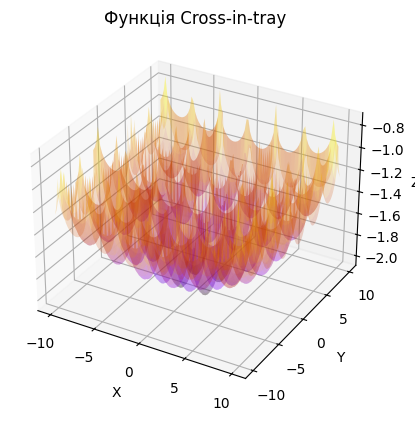

In [13]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = cross_in_tray_function([X, Y])
print(np.min(Z))

# Відображення 3D графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gnuplot', alpha=.2)

# Налаштування підписів
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Функція Cross-in-tray')

plt.show()

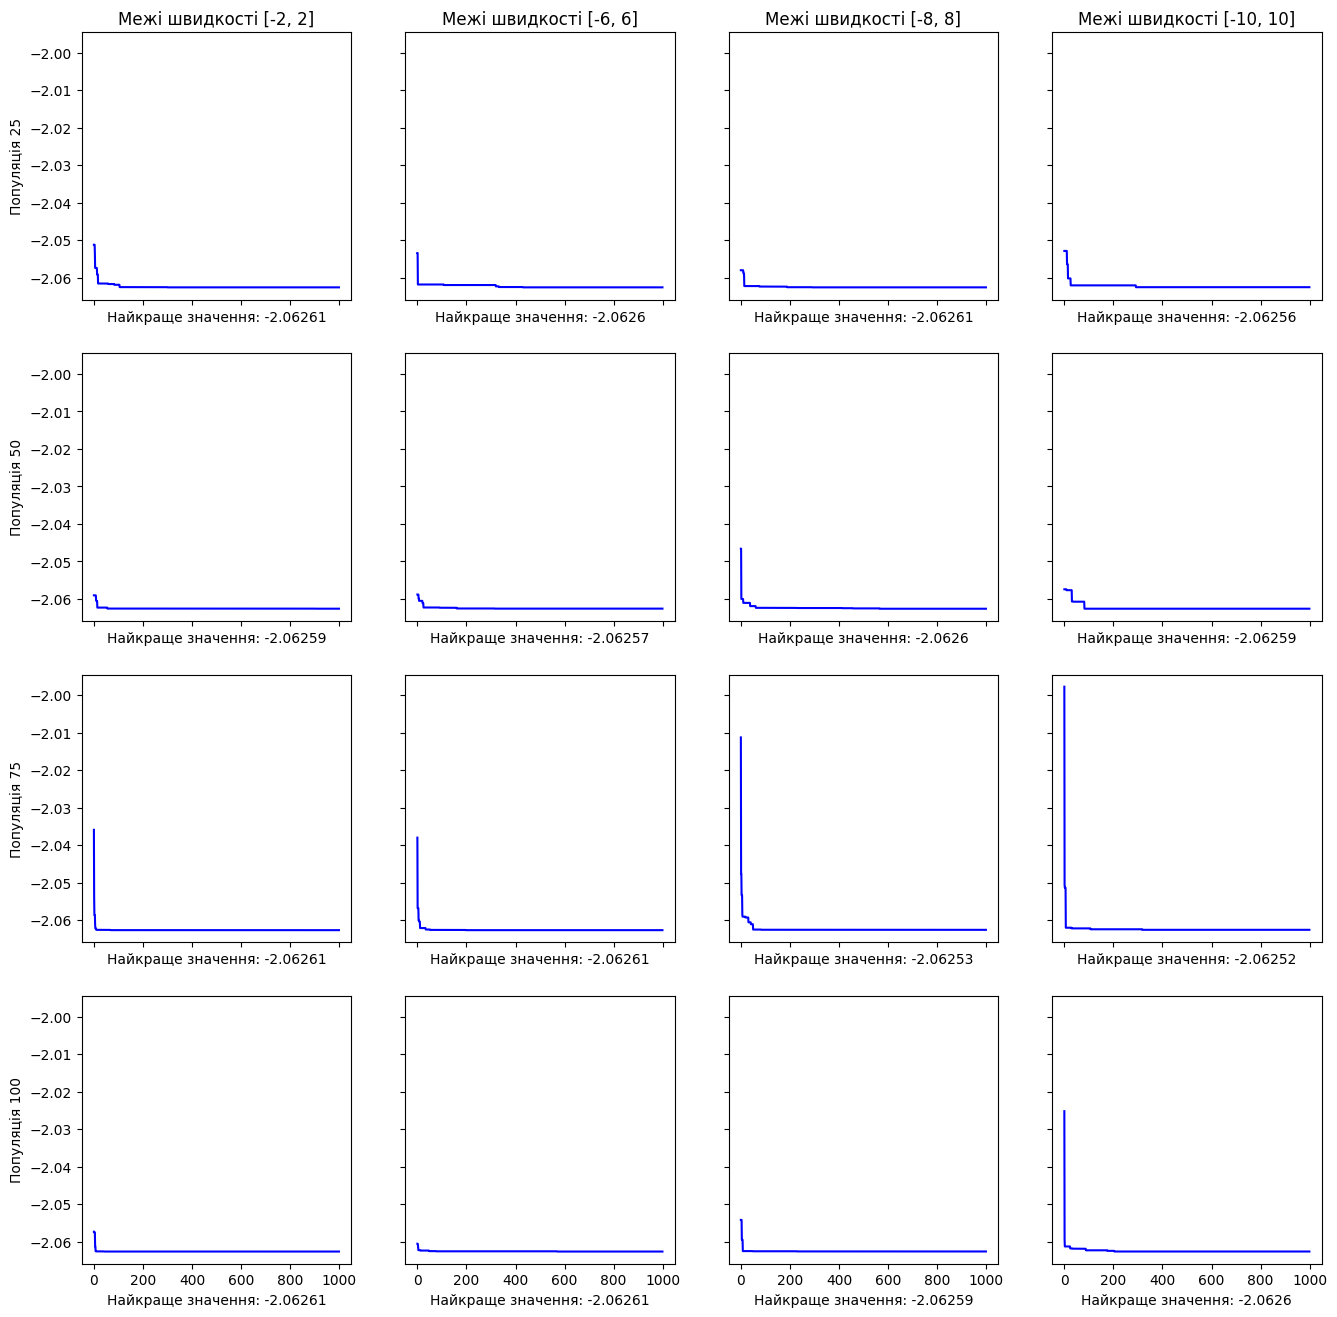

In [14]:
populations = [25, 50, 75, 100]
speeds = [2, 6, 8, 10]

fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)

for p in range(4):
    for s in range(4):
        bsf, _, _ = sw.PSO(cross_in_tray_function, 1000, populations[p], 2, [-10]*2, [10]*2, [-speeds[s]]*2, [speeds[s]]*2)
        axs[p][s].plot(list(range(1000)), bsf, color="blue")
        axs[p][s].set_xlabel(f"Найкраще значення: {round(min(bsf), 5)}")
        if p == 0:
            axs[p][s].set_title(f"Межі швидкості [-{speeds[s]}, {speeds[s]}]")
        if s == 0:
            axs[p][s].set_ylabel(f"Популяція {populations[p]}")

In [ ]:
cit_bsf, cit_bp, cit_swrm = sw.PSO(cross_in_tray_function, 100, 75, 2, [-10]*2, [10]*2, [-2]*2, [2]*2)

In [ ]:
# Налаштування фігури
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


def update(frame):
    ax1.clear()
    ax2.clear()
    
    x_swrm = (cit_swrm[frame])[..., 0]
    y_swrm = (cit_swrm[frame])[..., 1]
    z_swrm = cross_in_tray_function([x_swrm, y_swrm])
    
    ax1.plot_surface(X, Y, Z, cmap='gnuplot', alpha=0.2)
    ax1.scatter(x_swrm, y_swrm, z_swrm, c='green')
    ax1.scatter(cit_bp[frame][0], cit_bp[frame][1], cit_bsf[frame], c='red')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D-графік пошуку')
    ax1.legend()
    
    
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='gnuplot')
    ax2.scatter(x_swrm, y_swrm, c='green', s=20)
    ax2.scatter(cit_bp[frame][0], cit_bp[frame][1], c='red', s=20)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Контурний графік')
    
    # Заголовок з номером ітерації
    fig.suptitle(f'Ітерація: {frame + 1}, Найкраще значення: {cit_bsf[frame]}')
    return contour, 

# Генерація анімації
ani = FuncAnimation(
    fig, 
    update, 
    frames=100, 
    interval=50,
    blit=True
)

# Збереження у форматі GIF
ani.save('Cross_in_tray.gif', fps=12)

plt.close()

C:\Users\berku\AppData\Local\Temp\ipykernel_30412\1881198033.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\berku\AppData\Local\Temp\ipykernel_30412\1881198033.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


### Holder Table Function

In [17]:
def holder_table_function(vec):
    x = vec[0]
    y = vec[1]
    
    return -abs(np.sin(x)*np.cos(y)*np.exp(abs(1 - np.sqrt(x**2 + y**2)/np.pi)))

-19.10529208177748


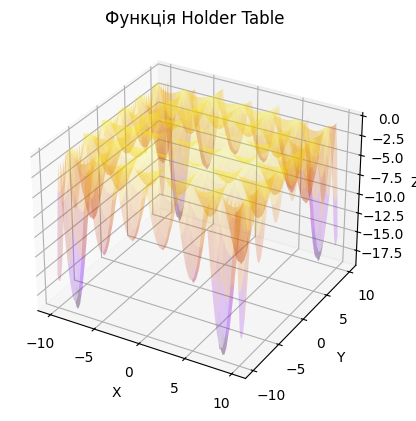

In [18]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = holder_table_function([X, Y])
print(np.min(Z))

# Відображення 3D графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gnuplot', alpha=.2)

# Налаштування підписів
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Функція Holder Table')

plt.show()

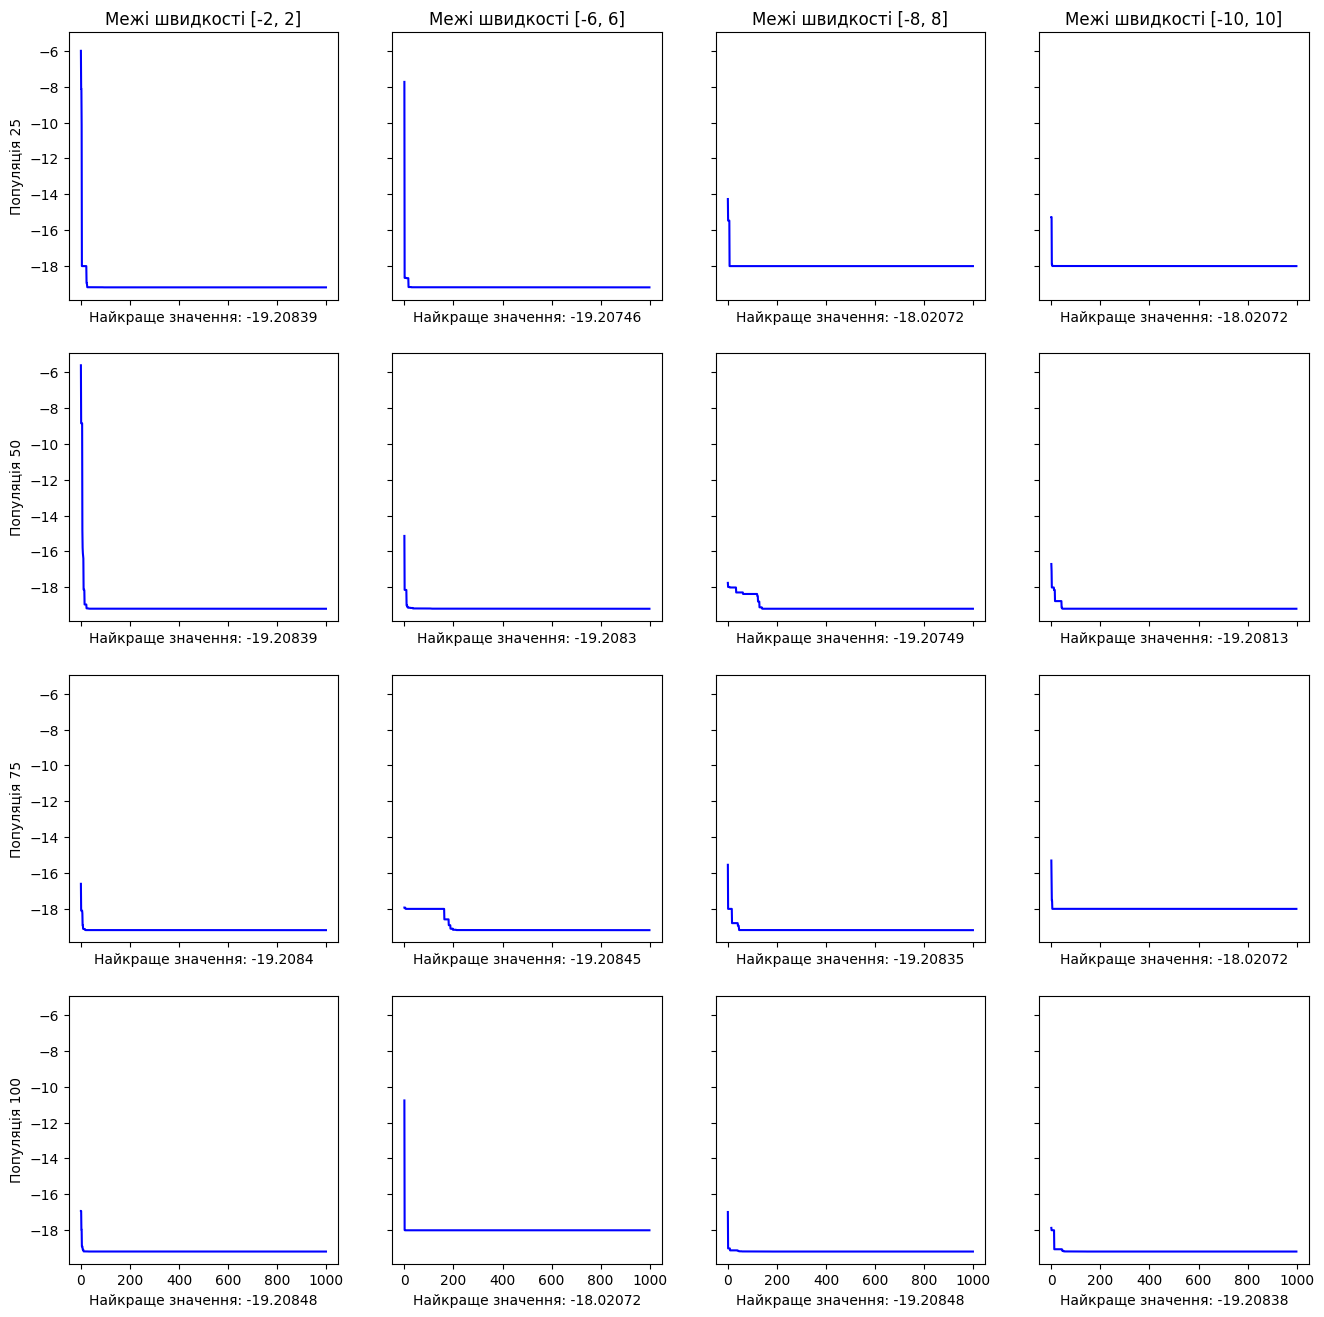

In [19]:
populations = [25, 50, 75, 100]
speeds = [2, 6, 8, 10]

fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)

for p in range(4):
    for s in range(4):
        bsf, _, _ = sw.PSO(holder_table_function, 1000, populations[p], 2, [-10]*2, [10]*2, [-speeds[s]]*2, [speeds[s]]*2)
        axs[p][s].plot(list(range(1000)), bsf, color="blue")
        axs[p][s].set_xlabel(f"Найкраще значення: {round(min(bsf), 5)}")
        if p == 0:
            axs[p][s].set_title(f"Межі швидкості [-{speeds[s]}, {speeds[s]}]")
        if s == 0:
            axs[p][s].set_ylabel(f"Популяція {populations[p]}")

In [20]:
ht_bsf, ht_bp, ht_swrm = sw.PSO(cross_in_tray_function, 100, 75, 2, [-10]*2, [10]*2, [-2]*2, [2]*2)

In [ ]:
# Налаштування фігури
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


def update(frame):
    ax1.clear()
    ax2.clear()
    
    x_swrm = (ht_swrm[frame])[..., 0]
    y_swrm = (ht_swrm[frame])[..., 1]
    z_swrm = cross_in_tray_function([x_swrm, y_swrm])
    
    ax1.plot_surface(X, Y, Z, cmap='gnuplot', alpha=0.2)
    ax1.scatter(x_swrm, y_swrm, z_swrm, c='green')
    ax1.scatter(ht_bp[frame][0], ht_bp[frame][1], ht_bsf[frame], c='red')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D-графік пошуку')
    ax1.legend()
    
    
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='gnuplot')
    ax2.scatter(x_swrm, y_swrm, c='green', s=20)
    ax2.scatter(ht_bp[frame][0], ht_bp[frame][1], c='red', s=20)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Контурний графік')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    
    # Заголовок з номером ітерації
    fig.suptitle(f'Ітерація: {frame + 1}, Найкраще значення: {ht_bsf[frame]}')
    return contour, 

# Генерація анімації
ani = FuncAnimation(
    fig, 
    update, 
    frames=100, 
    interval=50,
    blit=True
)

# Збереження у форматі GIF
ani.save('Holder_Table.gif', fps=12)

plt.close()

### McCormick function

In [21]:
def mcCormick_function(vec):
    x = vec[0]
    y = vec[1]
    return np.sin(x + y) + (x - y)**2 - 1.5*x + 2.5*y + 1

-1.9094785310539781


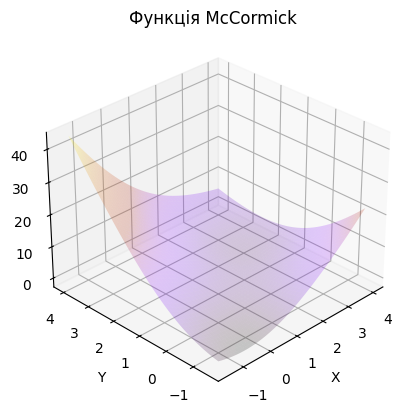

In [22]:
x = np.linspace(-1.5, 4, 100)
y = np.linspace(-1.5, 4, 100)
X, Y = np.meshgrid(x, y)
Z = mcCormick_function([X, Y])
print(np.min(Z))

# Відображення 3D графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gnuplot', alpha=.2)

# Налаштування підписів
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Функція McCormick')
ax.view_init(elev=30, azim=225)

plt.show()

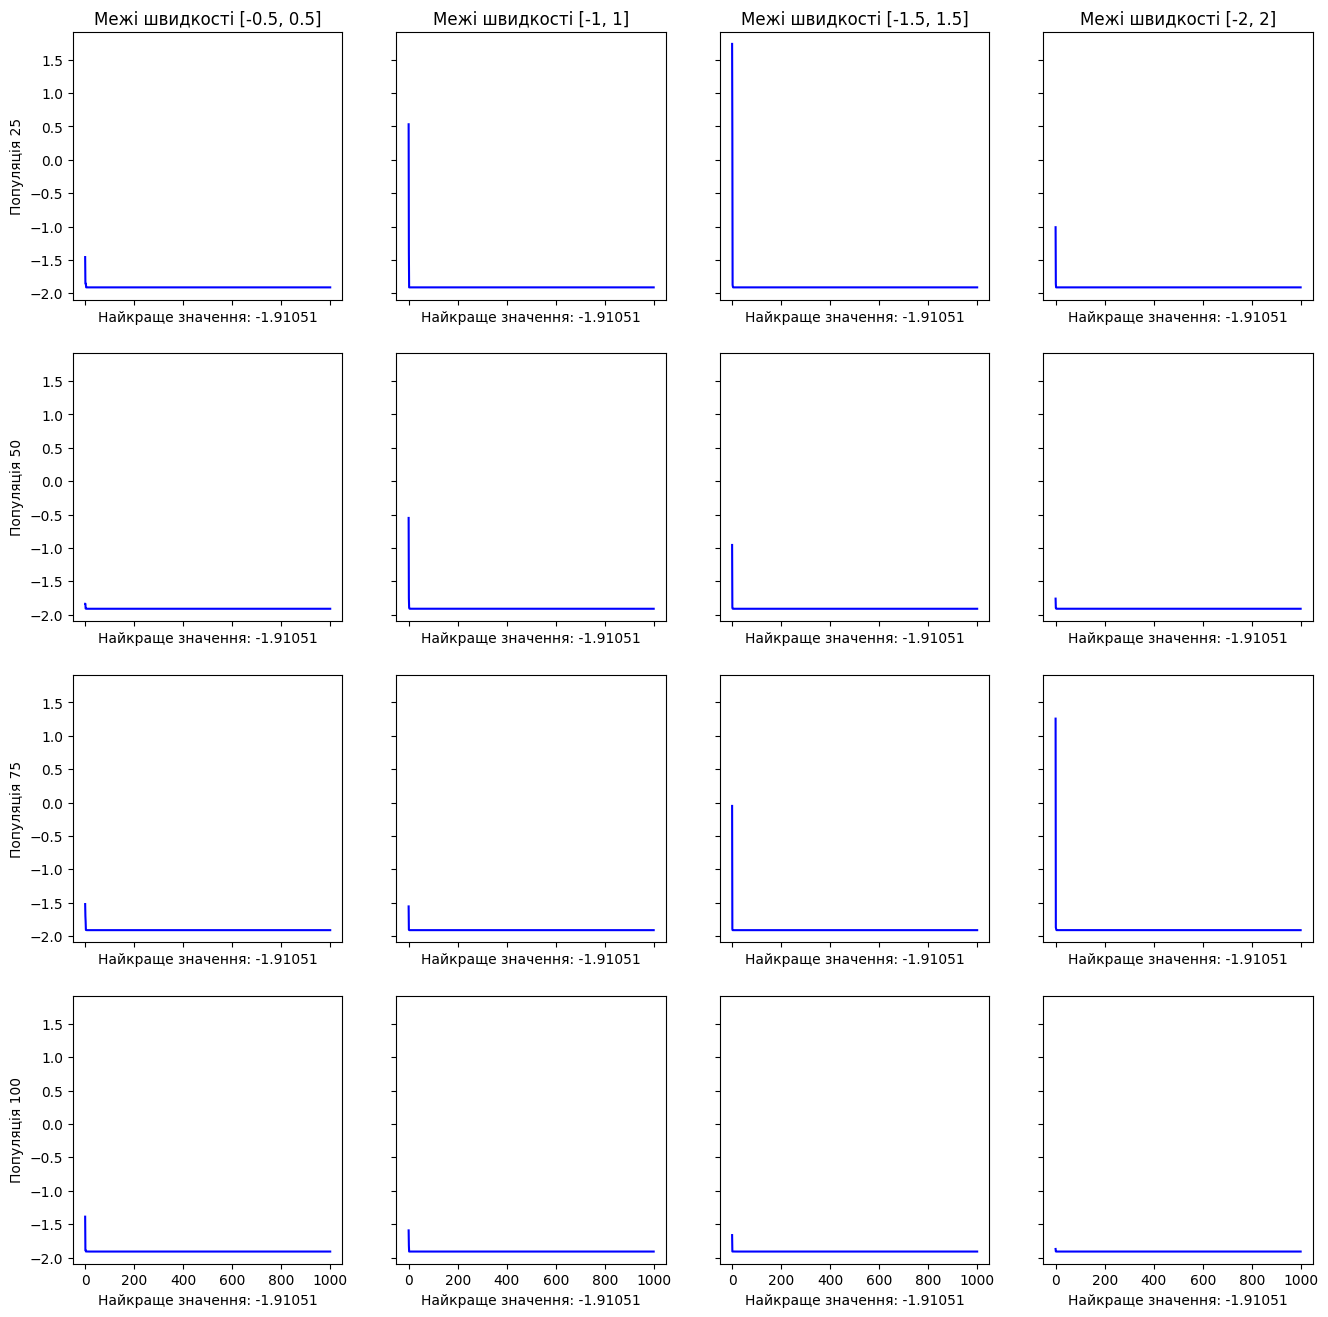

In [23]:
populations = [25, 50, 75, 100]
speeds = [.5, 1, 1.5, 2]

fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)

for p in range(4):
    for s in range(4):
        bsf, _, _ = sw.PSO(mcCormick_function, 1000, populations[p], 2, [-1.5]*2, [4]*2, [-speeds[s]]*2, [speeds[s]]*2)
        axs[p][s].plot(list(range(1000)), bsf, color="blue")
        axs[p][s].set_xlabel(f"Найкраще значення: {round(min(bsf), 5)}")
        if p == 0:
            axs[p][s].set_title(f"Межі швидкості [-{speeds[s]}, {speeds[s]}]")
        if s == 0:
            axs[p][s].set_ylabel(f"Популяція {populations[p]}")

In [24]:
mc_bsf, mc_bp, mc_swrm = sw.PSO(cross_in_tray_function, 100, 75, 2, [-1.5]*2, [4]*2, [-.5]*2, [.5]*2)

In [ ]:
# Налаштування фігури
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


def update(frame):
    ax1.clear()
    ax2.clear()
    
    x_swrm = (ht_swrm[frame])[..., 0]
    y_swrm = (ht_swrm[frame])[..., 1]
    z_swrm = cross_in_tray_function([x_swrm, y_swrm])
    
    ax1.plot_surface(X, Y, Z, cmap='gnuplot', alpha=0.2)
    ax1.scatter(x_swrm, y_swrm, z_swrm, c='green')
    ax1.scatter(ht_bp[frame][0], ht_bp[frame][1], ht_bsf[frame], c='red')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D-графік пошуку')
    ax1.legend()
    
    
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='gnuplot')
    ax2.scatter(x_swrm, y_swrm, c='green', s=20)
    ax2.scatter(ht_bp[frame][0], ht_bp[frame][1], c='red', s=20)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Контурний графік')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    
    # Заголовок з номером ітерації
    fig.suptitle(f'Ітерація: {frame + 1}, Найкраще значення: {ht_bsf[frame]}')
    return contour, 

# Генерація анімації
ani = FuncAnimation(
    fig, 
    update, 
    frames=100, 
    interval=50,
    blit=True
)

# Збереження у форматі GIF
ani.save('McCormick.gif', fps=12)

plt.close()

### Styblinski-Tang Function

In [25]:
def styblinski_tang_function(vec):
    # [-5, 5]
    x = vec[0]
    y = vec[1]
    return (x**4 - 16*x**2 + 5*x)/2 + (y**4 - 16*y**2 + 5*y)/2

-78.31132933812624


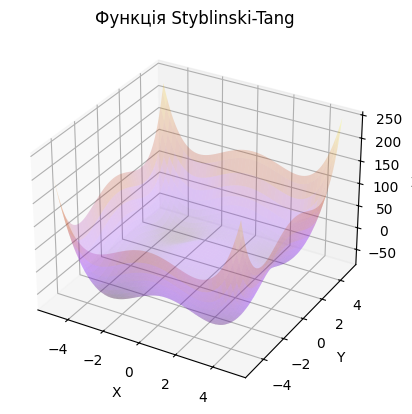

In [26]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = styblinski_tang_function([X, Y])
print(np.min(Z))

# Відображення 3D графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gnuplot', alpha=.2)

# Налаштування підписів
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Функція Styblinski-Tang')

plt.show()

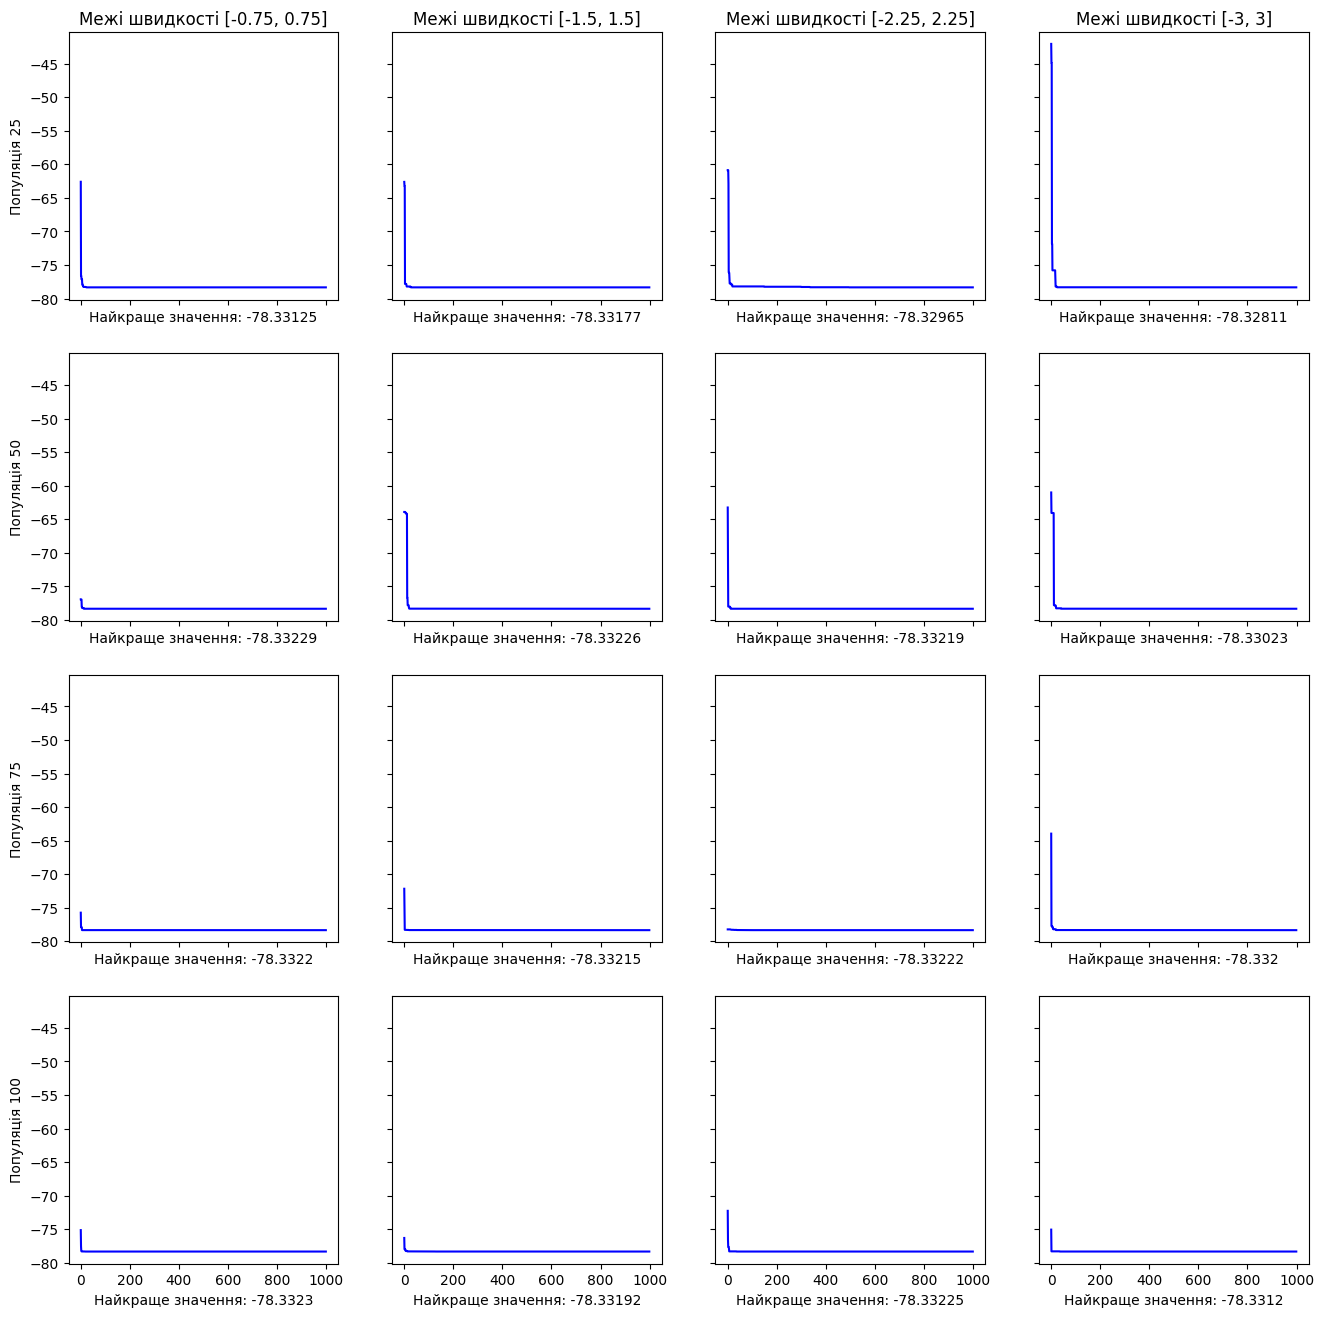

In [27]:
populations = [25, 50, 75, 100]
speeds = [.75, 1.5, 2.25, 3]

fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)

for p in range(4):
    for s in range(4):
        bsf, _, _ = sw.PSO(styblinski_tang_function, 1000, populations[p], 2, [-5]*2, [5]*2, [-speeds[s]]*2, [speeds[s]]*2)
        axs[p][s].plot(list(range(1000)), bsf, color="blue")
        axs[p][s].set_xlabel(f"Найкраще значення: {round(min(bsf), 5)}")
        if p == 0:
            axs[p][s].set_title(f"Межі швидкості [-{speeds[s]}, {speeds[s]}]")
        if s == 0:
            axs[p][s].set_ylabel(f"Популяція {populations[p]}")

In [28]:
st_bsf, st_bp, st_swrm = sw.PSO(cross_in_tray_function, 100, 75, 2, [-5]*2, [5]*2, [-1.5]*2, [1.5]*2)

In [ ]:
# Налаштування фігури
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


def update(frame):
    ax1.clear()
    ax2.clear()
    
    x_swrm = (ht_swrm[frame])[..., 0]
    y_swrm = (ht_swrm[frame])[..., 1]
    z_swrm = cross_in_tray_function([x_swrm, y_swrm])
    
    ax1.plot_surface(X, Y, Z, cmap='gnuplot', alpha=0.2)
    ax1.scatter(x_swrm, y_swrm, z_swrm, c='green')
    ax1.scatter(ht_bp[frame][0], ht_bp[frame][1], ht_bsf[frame], c='red')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D-графік пошуку')
    ax1.legend()
    
    
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='gnuplot')
    ax2.scatter(x_swrm, y_swrm, c='green', s=20)
    ax2.scatter(ht_bp[frame][0], ht_bp[frame][1], c='red', s=20)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Контурний графік')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    
    # Заголовок з номером ітерації
    fig.suptitle(f'Ітерація: {frame + 1}, Найкраще значення: {ht_bsf[frame]}')
    return contour, 

# Генерація анімації
ani = FuncAnimation(
    fig, 
    update, 
    frames=100, 
    interval=50,
    blit=True
)

# Збереження у форматі GIF
ani.save('Styblinski_Tang.gif', fps=12)

plt.close()